In [81]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from astropy.io import fits
from lsst.sims.utils import raDec2Hpid, healbin
import healpy as hp
from lsst.sims.maf.maps import TrilegalDensityMap

In [13]:
hdul = fits.open('decam_flux_l0.5b2.5.fits')
data = hdul[1].data.copy()
hdul.close()

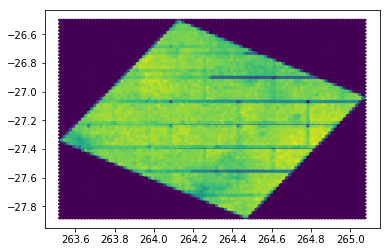

In [17]:
nz = np.where(data['ra_ok'] != 0)[0]
plt.hexbin(data['ra_ok'][nz], data['dec_ok'][nz])

In [23]:
data['mean'][:,1]
# I'm guessing it's in grizY order. 
# https://datalab.noao.edu/decaps/index.php
#All fluxes are in units of "3631 Jy," so that the AB magnitudes of the stars are given by -2.5*log10(flux)

1.1237948e-06

In [24]:
rmag = -2.5*np.log10(data['mean'][:,1])

/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [36]:
good = np.where(data['mean'][:,1] > 0)[0]

In [31]:
rmag[good].max()

30.385235

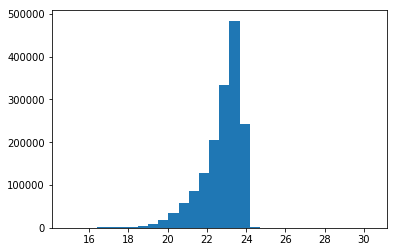

In [33]:
ack = plt.hist(rmag[good], bins=30)

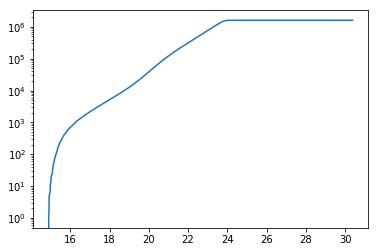

In [38]:
order = np.argsort(rmag[good])
plt.semilogy(rmag[good[order]], np.arange(order.size))

In [39]:
order.size

1610910

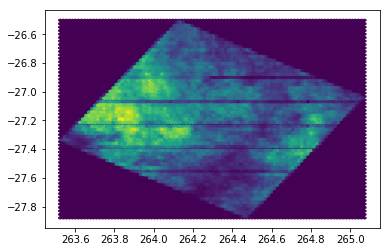

In [40]:
plt.hexbin(data['ra_ok'][good], data['dec_ok'][good])

In [55]:
# Let's estimate the area of that square. Can just use healpix I suppose
nside = 2048*2
#hpids = raDec2Hpid(nside, data['ra_ok'][good], data['dec_ok'][good])
count_map = healbin(data['ra_ok'][good], data['dec_ok'][good], good*0+1, nside=nside, reduceFunc=np.sum)

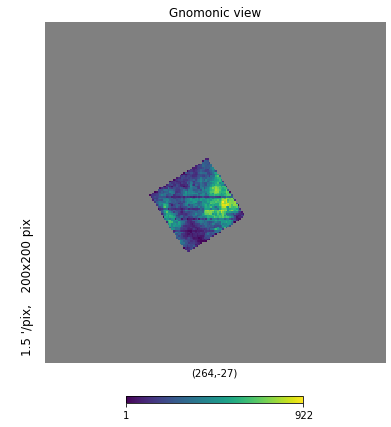

In [56]:
hp.gnomview(count_map, rot=(264, -27))

In [67]:
n_hp = np.where(count_map > 10)[0].size
area = hp.nside2pixarea(nside, degrees=True) * n_hp

In [68]:
area

1.0251430925272138

(1000.0, 3000000.0)

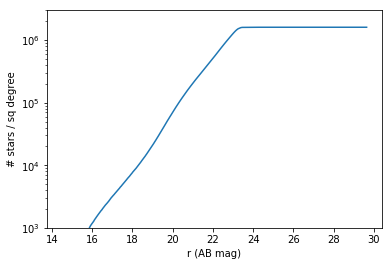

In [64]:
plt.semilogy(rmag[good[order]]/area, np.arange(order.size))
plt.ylabel('# stars / sq degree')
plt.xlabel('r (AB mag)')
plt.ylim([1e3,3e6])

In [85]:
filtername='r'
galfast = np.load('/Users/yoachim/git_repos/sims_maps/StarMaps/starDensity_%s_nside_64.npz' % filtername)
# Cumulative number counts, units of stars/sq deg. Array at healpix locations
starDensity = galfast['starDensity'].copy()
# magnitude bins 
galfast_bins=galfast['bins'].copy()
# pixels where there were so many stars some were skipped
mask = galfast['overMaxMask']


In [94]:
nside = 64
tri_map = TrilegalDensityMap(filtername=filtername, nside=nside)
tri_map._readMap()

ra = 264.2
dec = -27.2

slicePoint = {'ra':[ra], 'dec':[dec]}
slicePoint = tri_map.run(slicePoint)

In [87]:

hpid = raDec2Hpid(nside, ra,dec)


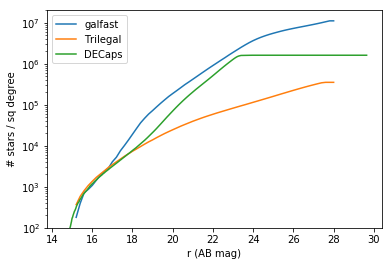

In [98]:
plt.semilogy(galfast_bins[1:], starDensity[hpid], label='galfast')

plt.semilogy(slicePoint['starMapBins_r'][1:],slicePoint['starLumFunc_r'].ravel() , label='Trilegal')


plt.semilogy(rmag[good[order]]/area, np.arange(order.size), label='DECaps')


plt.ylabel('# stars / sq degree')
plt.xlabel('r (AB mag)')
plt.ylim([1e2,2e7])
plt.legend()

In [74]:
starDensity.shape

(49152, 65)

/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


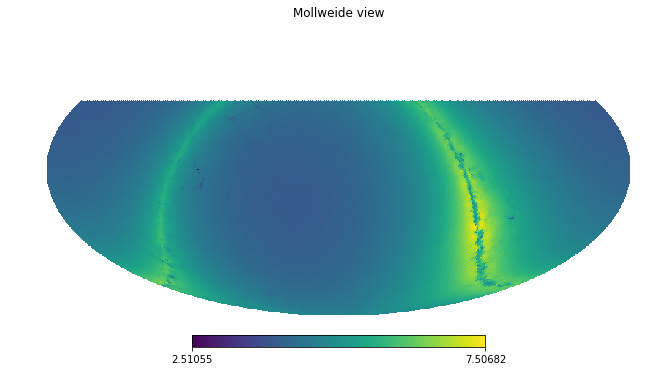

In [100]:
hp.mollview(np.log10(starDensity[:,-1]))

/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


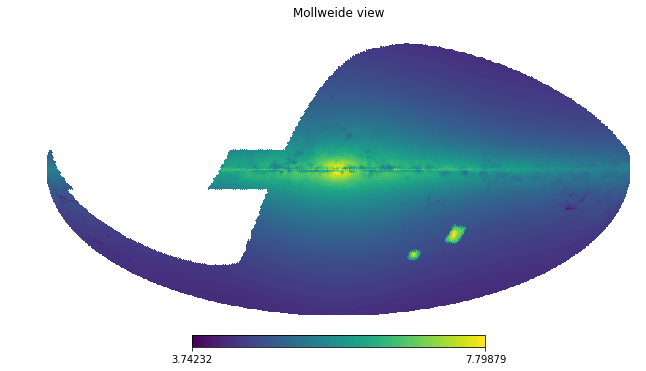

In [103]:
hp.mollview(np.log10(tri_map.starMap[:,-1]), nest=True)

In [105]:
np.sum(tri_map.starMap[:,-1])*hp.nside2pixarea(nside, degrees=True)/1e9

11.415928974999998

In [106]:
np.sum(starDensity[:,-1])*hp.nside2pixarea(nside, degrees=True)/1e9

8.992716334246065